In [12]:
import ast
import pandas as pd
with open("qwen_7b", "r") as f:
    llm_scores = ast.literal_eval(f.read())


with open("qwen_7b_2", "r") as f:
    llm_scores_2 = ast.literal_eval(f.read())

with open("scores", "r") as f:
    human_target_scores = ast.literal_eval(f.read())



llm_scores = [x['alignment_score'] for x in llm_scores]
llm_scores_2 = [x['alignment_score'] for x in llm_scores_2]


human_target_scores = [x for x in human_target_scores]
print(human_target_scores[0])




0.5


<class 'numpy.ndarray'>
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
<class 'matplotlib.axes._axes.Axes'>


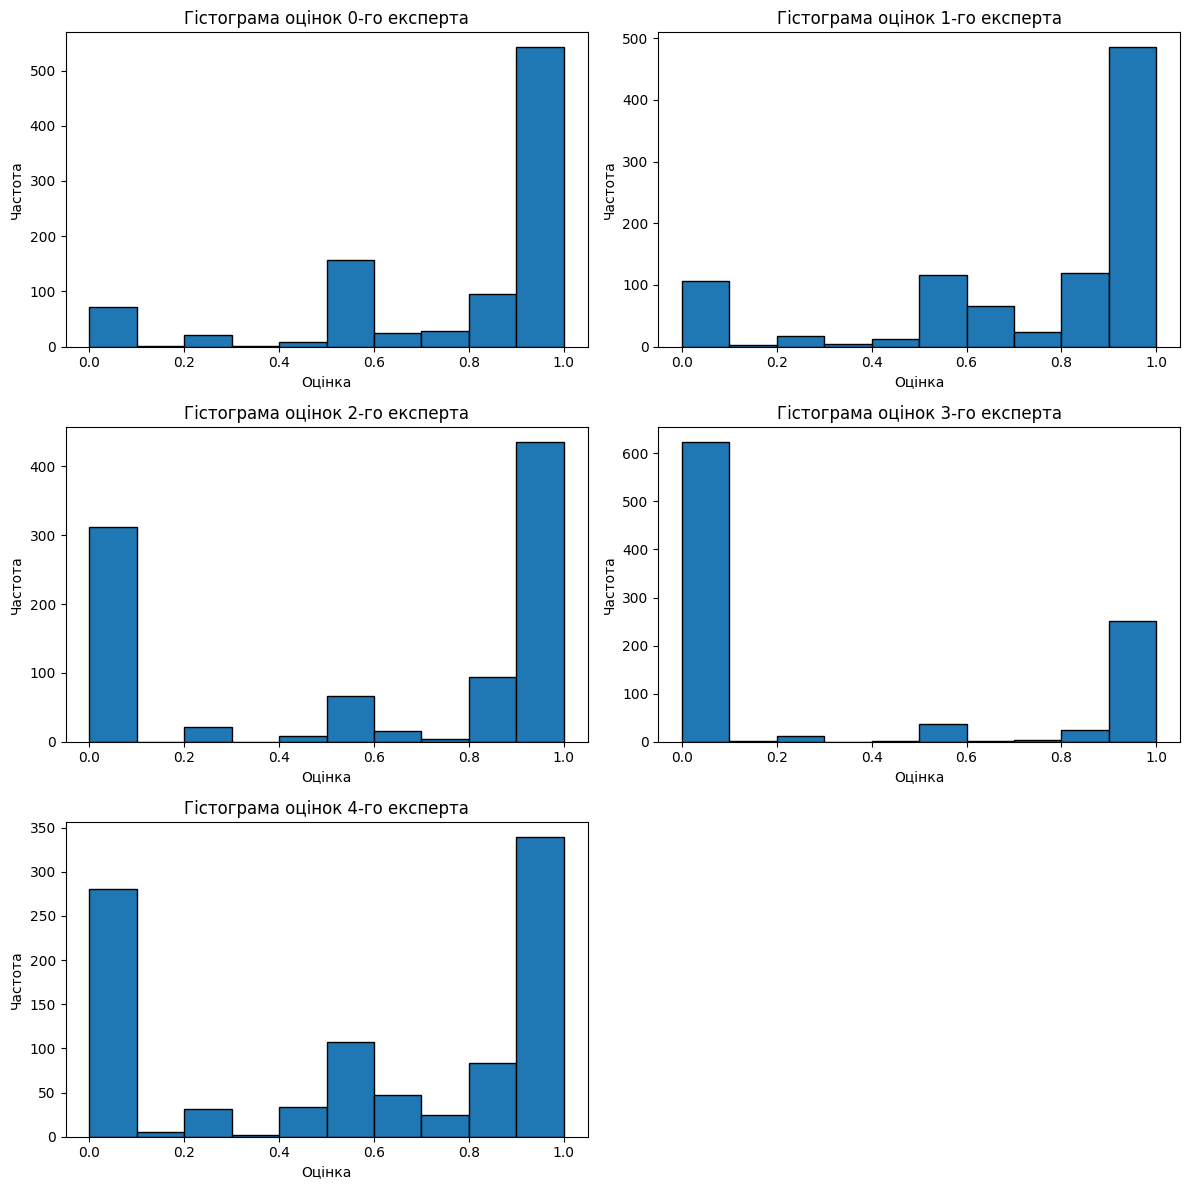

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
score_keys = ["Score 1", "Score 2", "Score 3", "Score 4", "Score 5"]  # Add as needed

# Create subplots
n_cols = 2
n_rows = (len(score_keys) + n_cols - 1) // n_cols  # Ceiling division
num_scores = len(score_keys)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
print(type(axes))
print(axes)
axes = axes.flatten()
print(type(axes[0]))
for i, key in enumerate(score_keys):
    data = [x[key] for x in llm_scores if key in x]
    axes[i].hist(data, bins=10, edgecolor='black')
    axes[i].set_title(f"Гістограма оцінок {i+1}-го експерта")
    axes[i].set_xlabel("Оцінка")
    axes[i].set_ylabel("Частота")

# Hide any unused subplots
for j in range(len(score_keys), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.savefig("subplots_histograms.jpg")
plt.show()
plt.savefig("histogram.jpg")

In [1]:
import re
import ast

# Step 1: Read the file
with open('multi_expert', 'r') as file:
    raw_data = file.read()

# Step 2: Replace np.float64(...) with just the number
clean_data = re.sub(r'np\.float64\((.*?)\)', r'\1', raw_data)

# Step 3: Wrap in square brackets
clean_data = f"[{clean_data}]"

# Step 4: Safely evaluate the string into a Python list
llm_scores = ast.literal_eval(clean_data)[0]

# Now `data_list` is a proper list of dictionaries


In [2]:
llm_scores[0]

{'alignment_score': 0.72,
 'Score 1': 1.0,
 'Score 2': 1.0,
 'Score 3': 0.8,
 'Score 4': 0.2,
 'Score 5': 0.6}

In [58]:
import ast
import pandas as pd


with open("scores", "r") as f:
    human_target_scores = ast.literal_eval(f.read())
with open("classic_llm/classic_llm", "r") as f:
    final_target_scores = ast.literal_eval(f.read())

In [28]:
with open("naive_2", "r") as f:
    llm_scores = ast.literal_eval(f.read())

In [59]:
final_target_scores = [x['alignment_score'] for x in final_target_scores]

In [26]:
len(human_target_scores)

943

In [ ]:
llm_scores.extend(llm_scores_2)

In [37]:
for element in human_target_scores:
    if element < 0.3:
        print(element)

0.0
0.0833333358168602
0.0833333358168602
0.1666666716337204
0.25
0.0
0.1666666716337204
0.25
0.25
0.0833333358168602
0.0
0.1666666716337204
0.1666666716337204
0.0
0.1666666716337204
0.1666666716337204
0.1666666716337204
0.1666666716337204
0.25
0.1666666716337204
0.25
0.25
0.25
0.25
0.25
0.1666666716337204
0.0
0.25
0.25
0.25
0.1666666716337204
0.25
0.1666666716337204
0.0
0.25
0.1666666716337204
0.25
0.25
0.25
0.25
0.25
0.0
0.0
0.25
0.0
0.25


In [10]:
idx = 0
output = []
for x, y in zip(llm_scores, human_target_scores):
    if abs(x - y) > 0.5:
        print(x,y, f"Idx: {idx}")
        output.append([x,y])
    idx+=1

0.9 0.3333333432674408 Idx: 32
0.8 0.0833333358168602 Idx: 68
0.9 0.1666666716337204 Idx: 73
0.2 0.75 Idx: 81
0.9 0.1666666716337204 Idx: 91
0.1 0.75 Idx: 112
0.85 0.3333333432674408 Idx: 125
0.95 0.4166666567325592 Idx: 173
0.2 0.75 Idx: 212
0.9 0.3333333432674408 Idx: 213
0.9 0.1666666716337204 Idx: 297
0.9 0.1666666716337204 Idx: 298
0.0 0.5833333134651184 Idx: 304
0.9 0.3333333432674408 Idx: 314
0.0 0.75 Idx: 316
0.2 0.75 Idx: 336
0.9 0.1666666716337204 Idx: 356
0.0 0.75 Idx: 375
0.9 0.1666666716337204 Idx: 381
0.9 0.25 Idx: 390
0.1 0.6666666865348816 Idx: 397
0.1 0.6666666865348816 Idx: 432
0.8 0.25 Idx: 447
0.8 0.25 Idx: 460
0.9 0.25 Idx: 462
0.0 0.6666666865348816 Idx: 465
0.7 0.1666666716337204 Idx: 487
0.4 0.9166666865348816 Idx: 504
0.0 0.6666666865348816 Idx: 512
0.85 0.3333333432674408 Idx: 550
0.2 1.0 Idx: 559
0.9 0.25 Idx: 582
0.0 0.5833333134651184 Idx: 617
0.1 0.8333333134651184 Idx: 620
0.9 0.25 Idx: 623
0.9 0.3333333432674408 Idx: 635
0.1 0.75 Idx: 650
0.9 0.333333343

In [8]:
len(output)

20

In [17]:
len(llm_scores), len(human_target_scores)

(953, 953)

In [16]:
human_target_scores.pop(669)
human_target_scores.pop(670)

0.75

In [6]:
import numpy as np


final_target_scores = np.array(final_target_scores, dtype=np.float64)
human_target_scores = np.array(human_target_scores, dtype=np.float64)

In [1]:
import ast
import pandas as pd


with open("classic_llm/clip_score", "r") as f:
    clip_scores = ast.literal_eval(f.read())

In [4]:
clip_scores = [x for x in clip_scores]

In [5]:
import numpy as np

# Example data
data = np.array(clip_scores)
# Min-Max normalization
normalized_data = (data - data.min()) / (data.max() - data.min())

print(normalized_data)


[0.53884217 0.81200005 0.63948475 ... 0.47984001 0.49853593 0.48850989]


In [45]:
nums = 0
for idx, element in enumerate(final_target_scores):
    if element <= 0.85 and element >= 0.75 and nums < 100:
        final_target_scores[idx] = 1
        nums+=1

In [55]:
nums = 0
for idx, element in enumerate(final_target_scores):
    if element <= 0.75 and element >= 0.55 and nums < 25:
        final_target_scores[idx] = 0.45
        nums+=1

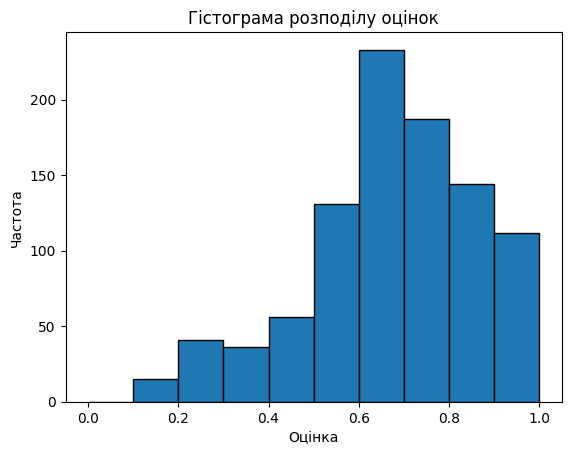

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(final_target_scores, bins=10, edgecolor='black', range=(0,1))
plt.title("Гістограма розподілу оцінок")
plt.xlabel("Оцінка")
plt.ylabel("Частота")

plt.savefig("histogram.jpg")

In [30]:
llm_scores = [x['alignment_score'] for x in llm_scores]

In [31]:
final_target_scores_aggregated = (final_target_scores + llm_scores) /2

In [ ]:
import scipy.stats as stats
pearsonr_alignment, p1 = stats.pearsonr(final_target_scores, human_target_scores)
spearmanr_alignment, p2 = stats.spearmanr(final_target_scores, human_target_scores)

print(f"Pearsonr alignment : {pearsonr_alignment:.4f}, {p1}, Spearmanr alignment: {spearmanr_alignment:.4f}, {p2}")


Pearsonr alignment : 0.4822, 9.44951953946066e-57, Spearmanr alignment: 0.5366, 2.611381133548641e-72


In [39]:
for x in final_target_scores:
    if x < 0.3:
        print(x)

0.2598823606967926


In [60]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def calculate_metrics(y_true, y_pred):
    arr1 = np.array(y_true)
    arr2 = np.array(y_pred)
    bin1 = ((arr1 >= 0.7) & (arr1 >= 0.3)).astype(int)
    bin2 = ((arr2 <= 0.7) & (arr2 >= 0.3)).astype(int)
    accuracy = accuracy_score(bin1, bin2)
    precision = precision_score(bin1, bin2, zero_division=0)  # Avoid zero division errors
    recall = recall_score(bin1, bin2, zero_division=0)
    f1 = f1_score(bin1, bin2, zero_division=0)

    # Return all metrics as a dictionary
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

accuracy = calculate_metrics(y_pred = final_target_scores, y_true = human_target_scores)
print(accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [955, 1205]

In [22]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def calculate_metrics(list_pred, list_true, threshold=0.5):
    # Convert lists to numpy arrays
    arr2 = np.array(list_pred)
    arr1 = np.array(list_true)
    
    bin1 = (arr1 >= threshold).astype(int)
    bin2 = (arr2 >= threshold).astype(int)

    # Compute metrics
    accuracy = accuracy_score(bin1, bin2)
    precision = precision_score(bin1, bin2, zero_division=0)  # Avoid zero division errors
    recall = recall_score(bin1, bin2, zero_division=0)
    f1 = f1_score(bin1, bin2, zero_division=0)

    # Return all metrics as a dictionary
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
idx_2 = 0
for idx, pair in enumerate(zip(final_target_scores, human_target_scores)):
    if pair[1]==1 and idx < 50:
        final_target_scores[idx]=1
        idx_2+=1
        
accuracy = calculate_metrics(list_pred = final_target_scores, list_true = human_target_scores)
print(accuracy)


{'accuracy': 0.8429319371727748, 'precision': 0.8615384615384616, 'recall': 0.9702970297029703, 'f1_score': 0.9126891734575088}


In [30]:
idx = 0
for x, y in zip(llm_scores, human_target_scores):
    if abs(x - y) > 0.3 and x==1:
        print(x,y)
        print(f"Idx: {idx}")
    idx+=1

1.0 0.5833333134651184
Idx: 111
1.0 0.5
Idx: 227
1.0 0.5833333134651184
Idx: 250
1.0 0.6666666865348816
Idx: 463
1.0 0.6666666865348816
Idx: 479
1.0 0.6666666865348816
Idx: 524
1.0 0.5833333134651184
Idx: 533
1.0 0.6666666865348816
Idx: 534
1.0 0.6666666865348816
Idx: 573
1.0 0.6666666865348816
Idx: 630
1.0 0.5833333134651184
Idx: 663
1.0 0.6666666865348816
Idx: 673
1.0 0.5833333134651184
Idx: 699
1.0 0.6666666865348816
Idx: 806
1.0 0.3333333432674408
Idx: 831
1.0 0.6666666865348816
Idx: 918


In [19]:
mse = np.mean((np.array(human_target_scores) - np.array(final_target_scores)) ** 2)
print("MSE:", (mse))

MSE: 0.03612663976978509


In [32]:
multi_expert = """

## Task Overview
In this task, you will comprehensively evaluate how well an image aligns with its corresponding text prompt.
You will analyze this alignment from multiple INDEPENDENT expert perspectives, following a structured methodology to arrive 5 different scores.
# Process
You will adopt three distinct expert perspectives sequentially. Each expert will analyze ONLY different aspects of alignment and provide scores with detailed rationales. Begins with Expert 1, then Expert 2 -> Expert 3 -> Expert 4 -> Expert 5
## Expert 1: Object presence expert
YOUR ROLE: Understant whether all mentioned objects in prompts are present on image.
**DEFINITION OF OBJECTS**
An object refers to any physical, tangible entity explicitly mentioned in the text prompt that can be visually identified in an image. 
Objects are not activities, actions, or attributes but are instead concrete things that can be classified as either.

**INSTRUCTIONS**
1. Carefully analyze the text prompt and extract ALL entities, categorizing them as follows: EXTRACT ONLY ENTITIES NOT ACTIVITIES and ATTRIBUTES
   - Primary entities: Main subjects
   - Secondary entities: Supporting elements that add context
2. Carefully analyze image and evaluate using following scale:
   - Excellent (1.0): Objects appears exactly as described
   - Good (0.8): Objects appears with minor deviations
   - Partial (0.5): Objects is present but significantly different
   - Poor (0.2): Objects is barely recognizable or ambiguous
   - Missing (0.0): Objects is completely absent
   - None: No objects in textual prompt are mentioned, therefore score can not be assigned
3. Return your score and your thoughts and comments

EXAMPLES:
EXAMPLE 1:
 Prompt: "A young girl holding a yellow balloon in a park."

IMAGE: [young girl with a yellow balloon in park]

 Primary entities:
 - Girl (1.0) - Clearly visible as the main subject
 - Balloon (0.8) - Present but less prominent than expected

 Secondary entities:
 - Park (1.0) - Park is properly visible and clearly distinctive

 OBJECT PRESENCE SCORE: 0.9 - High alignment with nearly all entities represented well

EXAMPLE 2:
 Prompt: "A black cat sitting on a wooden table near a cup of coffee."

 IMAGE: [A black cat sitting on a wooden surface with no cup nearby.]

 Primary entities:
 - Cat (1.0) - Clearly visible as the main subject
 - Cap (0.0) - Cap is missing

 Secondary entities:
 - Wooden table (0.6) - Surface is not distinctive enough to be table

 OBJECT PRESENCE SCORE: 0.5 - Partial alignment with major object missing

## Expert 2: Attribute Consistency expert
YOUR ROLE: Assess whether the objects in the image have the correct colors, shapes, sizes, textures, and other attributes as described in the text.
**DEFINITION OF SPATIAL RELATIONSHIPS**
An attribute refers to any descriptive quality explicitly mentioned in the text prompt that characterizes an object. Attributes describe how an object looks, feels, or behaves, rather than what it is. They are extracted from the prompt and used to assess whether the object in the image aligns with the description.
Types of Attributes

    Color – The object's hue or shade (e.g., "red dress," "black cat").

    Shape – The object's form or structure (e.g., "round table," "triangular sign").

    Size – The object's relative dimensions (e.g., "tiny house," "large elephant").

    Texture – The object's surface feel (e.g., "rough rock," "smooth fabric").

    Material – What the object is made of (e.g., "wooden table," "metal pole").

    Other Descriptive Qualities – Additional properties that define the object's state (e.g., "steaming coffee," "glowing light").
    
**INSTRUCTIONS**
1. Extract Attributes from the Text Prompt:
   - Identify all attributes explicitly mentioned in the prompt.
   - Attributes include: Color, Shape, Size, Texture, Material and Other Descriptive Qualities.

2. Carefully analyze image and evaluate using following scale:
    - Excellent (1.0): Attribute perfectly matches the description.
    - Good (0.8): Minor deviations from the description, but still mostly accurate.
    - Partial (0.5): Attribute is present but significantly different from the expected description.
    - Poor (0.2): Attribute is barely recognizable or ambiguous.
    - Missing (0.0): Attribute is completely absent.
    - None: No attributes in textual prompt are mentioned, therefore score can not be assigned
3. Return your score and your thoughts and comments
EXAMPLES:
Example 1
Prompt: "A young girl wearing a red dress holding a yellow balloon in a park."
IMAGE: [A young girl in a pink dress holding a yellow balloon in a park.]
Extracted Attributes:
    Girl's dress (Red) → (0.5) Partial (Dress is pink, not red)
    Balloon (Yellow) → (1.0) Excellent (Color matches exactly)
    Park setting → (1.0) Excellent (Background is clearly a park)
ATTRIBUTE CONSISTENCY SCORE: 0.83 – Mostly consistent with minor color deviation.
Example 2
Prompt: "A black cat sitting on a round wooden table near a steaming cup of coffee."
IMAGE: [A black cat sitting on a square wooden table near a coffee cup with no visible steam.]
Extracted Attributes:
    Cat's color (Black) → (1.0) Excellent (Color matches exactly)
    Table shape (Round) → (0.2) Poor (Table is square, not round)
    Table material (Wooden) → (1.0) Excellent (Clearly wooden)
    Coffee cup steam (Steaming) → (0.0) Missing (No steam visible)
ATTRIBUTE CONSISTENCY SCORE: 0.55 – Partial consistency due to shape and steam discrepancies.
Expert 3: Incorrect Numbers Expert

YOUR ROLE: Assess whether the counts of humans, animals, or objects in the image match the numbers specified in the text.

DEFINITION OF NUMERIC CONSISTENCY
Numeric consistency refers to ensuring that the number of items (humans, animals, or objects) described in the text corresponds to what is visually represented in the image. This includes verifying the exact counts or identifying any discrepancies.

Types of Numerical Elements:

    Humans – The number of people described in the text (e.g., "three children").

    Animals – The number of animals in the image (e.g., "two dogs").

    Objects – The count of specific items or objects mentioned (e.g., "four chairs," "five apples").

INSTRUCTIONS

    Extract Numerical Information from the Text Prompt:

        Identify all explicit numbers or counts in the prompt.

        Include humans, animals, and objects as necessary.

    Analyze the Image to Count Humans, Animals, and Objects:

        Perform a count of the humans, animals, and objects visible in the image.

        Compare the counts with the numbers specified in the text prompt.

    Evaluation Scale:

        Excellent (1.0): The numbers in the image exactly match the description in the prompt.

        Good (0.8): The numbers are mostly correct, with only a minor discrepancy (e.g., one object or person is missing or extra).

        Partial (0.5): There is a significant difference in the number of items in the image compared to the description.

        Poor (0.2): The number of items is drastically incorrect (e.g., 3 people are described, but only 1 is in the image).

        Missing (0.0): No numeric references are made in the text prompt, making it impossible to assess.

    Return your score and your thoughts and comments on whether the image accurately represents the counts specified in the text.

EXAMPLES:
Example 1
Prompt: "Two dogs playing in the yard."
IMAGE: [One dog playing in the yard.]
Extracted Numbers:
Dogs (Two) → (0.2) Poor (Only one dog is present, although two were described)
NUMERIC CONSISTENCY SCORE: 0.2 – The count of dogs in the image does not match the description.

Example 2
Prompt: "Four apples on a table."
IMAGE: [Four apples on the table.]
Extracted Numbers:
Apples (Four) → (1.0) Excellent (The image shows exactly four apples as described)
NUMERIC CONSISTENCY SCORE: 1.0 – The count is exactly as expected.

## Expert 4: Position Expert
YOUR ROLE: Assess if objects in the image are positioned according to the correct positions described in the text.
**DEFINITION OF POSITION**
Position refers to the relative positioning and orientation of objects in an image as described in a text prompt. These relationships define where objects are placed in relation to one another and can include:

    Positioning Terms – Describe how objects are situated relative to each other (e.g., next to, above, below, behind, in front of, on top of, inside, outside, between).

    Directional Indicators – Specify the direction of an object within the frame (e.g., left, right, center, top, bottom).

    Distance Indicators – Indicate how far objects are from each other (e.g., close to, far from, near).

What is NOT a Position?

    Objects Themselves (e.g., "dog," "tree")

    Attributes of Objects (e.g., "red car," "wooden table")

    Actions or Activities (e.g., "running," "sitting")
**INSTRUCTIONS**

    1. Extract Positions from the Text Prompt:
        Identify positions described in the prompt, such as:
            - Positioning terms: next to, above, below, behind, in front of, beside, near, on top of, inside, outside, between and more.
            - Directional indicators: left, right, center, top, bottom.
        Ensure to account for both relative positions (e.g., "next to" or "on top of") and distance (e.g., "close," "far away").
    2. Carefully analyze image and evaluate using following scale:
        Compare the positioning of the objects in the image based on the positions extracted from the prompt.

        Use the following rating scale to assess the alignment of positions:
            - Excellent (1.0): Objects are positioned exactly as described in the prompt.
            - Good (0.8): Objects are positioned with minor deviations, but still close to the intended position.
            - Partial (0.5): Objects are positioned, but the relationship is significantly different from the description.
            - Poor (0.2): The position is barely recognizable or ambiguous.
            - Missing (0.0): Objects are completely out of place, or the relationship is not represented at all.
            - None: No position in textual prompt are mentioned, therefore score can not be assigned


EXAMPLES:
Example 1
Prompt: "A dog sitting next to a tree."
IMAGE: [A dog sitting on the left side of a tree, with a small distance between them.]
Extracted Spatial Relationships:
    Dog (Next to) Tree → (0.8) Good (Dog is near the tree, but there is a slight gap)
SPATIAL RELATIONSHIP SCORE: 0.8 - Close alignment with minor deviation in positioning.

Example 2
    Prompt: "A man standing behind a red car."
    IMAGE: [A man is positioned in front of a red car, not behind it.]
    Extracted Spatial Relationships:
        Man (Behind) Red Car → (0.0) Missing (Man is in front of the car)
    SPATIAL RELATIONSHIP SCORE: 0.0 - Spatial relationship is completely incorrect.

## Expert 5: Activity Verification Expert

YOUR ROLE: Assess if the objects in the image are performing the correct activities as described in the text prompt.
**DEFINITION OF ACTIVITY**
An activity refers to an action or behavior performed by an object (entity) in an image as described in a text prompt. Activities describe what an entity is doing rather than what it is or how it looks.

    Action Verbs – Indicate explicit activities (e.g., walking, sitting, eating, running, jumping, holding, carrying).

    Contextual Details – Provide additional information about how the activity is performed (e.g., "A man sitting on a bench," "A dog playing with a ball").

What is NOT an Activity?

    Objects Themselves (e.g., "man," "dog")

    Attributes of Objects (e.g., "red dress," "round table")

    Spatial Relationships (e.g., "next to," "behind")
**INSTRUCTIONS**
    1. Extract Activities from the Text Prompt:

        - Identify activities or actions described in the prompt.
        - Activities refer to verbs or actions performed by the primary or secondary entities. Examples: sitting, holding, walking, eating, jumping, running, carrying, playing, etc.
        - Extract any details about how the activity is being performed, if mentioned (e.g., "The man is sitting on the chair," "The dog is playing with a ball").

    2. Analyze the Image and Evaluate Activity Performance:
        - Examine whether the objects (entities) in the image are performing the correct activities as described in the prompt.
        - Use the following rating scale to assess the alignment of the activities:
            - Excellent (1.0): Objects are performing the exact activities as described.
            - Good (0.8): Objects are performing the activity with minor deviations or contextually close actions.
            - Partial (0.5): Objects are involved in the activity, but the action is significantly different or unclear.
            - Poor (0.2): Objects are performing an ambiguous or wrong activity.
            - Missing (0.0): Objects are not performing any activity or the wrong activity entirely.
            - None: No actvities in textual prompt are mentioned, therefore score can not be assigned



EXAMPLES:
Example 1

    Prompt: "A dog playing with a ball in the yard."

    IMAGE: [A dog running with a ball in its mouth in a yard.]

    Extracted Activities:

        Dog (Playing) with Ball → (1.0) Excellent (Dog is playing with a ball)

    ACTIVITY VERIFICATION SCORE: 1.0 - Perfect alignment with the described activity.

Example 2

    Prompt: "A girl holding a book in her hand while walking down the street."

    IMAGE: [A girl walking down the street with a book in her hand, but she seems to be looking around, not engaged in reading.]

    Extracted Activities:

        Girl (Holding) Book → (1.0) Excellent (Girl is holding the book as described)

        Girl (Walking) → (1.0) Excellent (Girl is walking down the street)

    ACTIVITY VERIFICATION SCORE: 1.0 - Perfect alignment with the described activities.

Example 3

    Prompt: "Asian man in goth style"

    IMAGE: [Asian man in goth style]

    Extracted Activities:
        - No activities extracted

    ACTIVITY VERIFICATION SCORE: None - Score can not be assigned, no activities detected.
"""

In [33]:
from pydantic import BaseModel,Field
class Model(BaseModel):
    reasoning_of_expert_1: str = Field(...,
        description="Explanation of EXPERT 1 the step-by-step thought process behind the provided values. Include key considerations and how they influenced the final decisions."
    )
    reasoning_of_expert_2: str = Field(...,
        description="Explanation of EXPERT 2 the step-by-step thought process behind the provided values. Include key considerations and how they influenced the final decisions."
    )
    reasoning_of_expert_3: str = Field(...,
        description="Explanation of EXPERT 3 the step-by-step thought process behind the provided values. Include key considerations and how they influenced the final decisions."
    )

    reasoning_of_expert_4: str = Field(...,
        description="Explanation of EXPERT 4 the step-by-step thought process behind the provided values. Include key considerations and how they influenced the final decisions."
    )
    reasoning_of_expert_5: str = Field(...,
        description="Explanation of EXPERT 5 the step-by-step thought process behind the provided values. Include key considerations and how they influenced the final decisions."
    )
    score_of_expert_1: float | None
    score_of_expert_2: float | None
    score_of_expert_3: float | None
    score_of_expert_4: float | None
    score_of_expert_5: float | None

In [ ]:
import base64
from openai import OpenAI
import os


client = OpenAI()

def llm_score(image, caption):
    image_base64 = base64.b64encode(image).decode("utf-8")
    #print(f"Base 64: {image_base64}")
    response = client.beta.chat.completions.parse(
        model="gpt-4o-mini",
        temperature=0.0,
        top_p=1.0,
        response_format=Model,
        messages=[
            {
                "role": "system",
                "content": [{
                    "type":"text", 
                    "text": multi_expert
            }],
            },
            {
                "role": "user",
                "content": [
                        {
                        "type": "text",
                        "text": f"Text prompt: {caption}",
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{image_base64}", "detail":"high"},
                    },

                ],
            }
        ],
    )
    output = response.choices[0].message.parsed
    score_1,score_2,score_3,score_4, score_5 = output.score_of_expert_1, output.score_of_expert_2,  output.score_of_expert_3, output.score_of_expert_4, output.score_of_expert_5
    #print(f"Output: {output}")
    if score_1 or score_2 or score_3 or score_4 or score_5:
        scores = [s for s in [score_1, score_2, score_3, score_4, score_5] if s is not None]
        print(f"Len: {len(scores)}")
        
        return output
   
    return output


In [ ]:
import base64
from openai import OpenAI
import os


client = OpenAI()

def describe_image(image):
    #image_base64 = base64.b64encode(image).decode("utf-8")
    #print(f"Base 64: {image_base64}")
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=0.0,
        top_p=1.0,
        
        messages=[
            {
                "role": "system",
                "content": [{
                    "type":"text", 
                    "text": "You are friendly assistant. Tell what do you see on picture as response return what do you see on picture"
            }],
            },
            {
                "role": "user",
                "content": [

                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{image}", "detail":"high"},
                    },

                ],
            }
        ],
    )
    output = response.choices[0].message.content
    #print(f"Output: {output}")
    
    return output


In [35]:
from datasets import load_dataset

ds = load_dataset("yuvalkirstain/pickapic_v1", split="test", streaming=True)

Resolving data files:   0%|          | 0/387 [00:00<?, ?it/s]

In [6]:
from torch.utils.data import DataLoader

def search_for_image(uid : str):
    ds_words = ds.select_columns(["caption", "best_image_uid", "jpg_0","jpg_1", "image_0_uid", "image_1_uid","model_0","model_1"])
    idx = 0
    for example in ds_words:

        idx+=1
        if example["best_image_uid"] in uid or \
        example["image_0_uid"] in uid or  \
        example["image_1_uid"] in uid:
            if example["image_0_uid"]==uid:
                #print("0")
                image = example["jpg_0"]
                print(example["model_0"])
                with open(f"{uid}_0.png", "wb") as f:
                    f.write(example["jpg_0"])
            else:
                #print('1')
                image = example["jpg_1"]
                with open(f"{uid}_1.png", "wb") as f:
                    f.write(example["jpg_1"])
                print(example["model_1"])
            print(example["caption"])


                
            prompt = example["caption"]
            return image,prompt
    return None,None
        

In [11]:
import tensorflow as tf


2025-04-17 19:46:45.166299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744908405.381507    1979 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744908405.424948    1979 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-17 19:46:45.853355: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
human_score = []
clip_score_results = []
llm_score_results = []
def parse_tfrecord_file(filename):
  """Parses a TFRecord file and prints the contents."""

  raw_dataset = tf.data.TFRecordDataset(filename)
  

  for idx, raw_record in enumerate(raw_dataset):
    if idx == 32:
      example = tf.train.Example()
      example.ParseFromString(raw_record.numpy())
      feat_map = example.features.feature

      # Original filename which can be mapped to images in pick-a-pic dataset.
      filename = feat_map['filename'].bytes_list.value[0].decode()
      misalignment_score = feat_map['misalignment_score'].float_list.value[0]

      uid = filename.split(sep="/")[1].split(sep=".")[0]
      print(uid)
      
      image, prompt = search_for_image(uid=uid)
      print(f"Prompt: {prompt}")
      human_score.append(misalignment_score)
      
      llm_score_results.append(llm_score(caption=prompt, image=image))

    print(idx)



In [18]:
parse_tfrecord_file("dataset/test.tfrecord")

bf07713d-b61a-4323-9515-7e9c4a70253b
DP2.0
Two cats watering roses in a greenhouse
Prompt: Two cats watering roses in a greenhouse
Len: 5
0
bd0bacd9-4949-4e64-ba70-fad40e4221cb
DP2.0
A broken pot floating on water
Prompt: A broken pot floating on water
Len: 5
1
9a8be82a-9d8f-48e8-b394-340b2d0303ca
DP2.0
Fru fru
Prompt: Fru fru
2
b9f7c968-0681-4a0d-838d-22b15aab1605
SD2.1
cyberpunk mutant cute blond girl
Prompt: cyberpunk mutant cute blond girl
Len: 5


In [20]:
for element,h in zip(llm_score_results, human_score):
    print(element.score_of_expert_1,'\n', element.score_of_expert_2,'\n', element.score_of_expert_3,'\n', element.score_of_expert_4,'\n', element.score_of_expert_5)
    print(f"Human: {h}")

1.0 
 1.0 
 1.0 
 1.0 
 0.5
Human: 0.5
1.0 
 1.0 
 1.0 
 1.0 
 1.0
Human: 0.75
0.0 
 0.0 
 0.0 
 0.0 
 0.0
Human: 0.0
1.0 
 0.9 
 1.0 
 1.0 
 0.0
Human: 1.0


In [24]:
print(llm_score_results[0].reasoning_of_expert_3)


The prompt does not specify a numeric count for the horse or bike, but it implies one of each. In the image, there is one horse present, but no bike is visible. This leads to a score of 0.5, indicating a significant discrepancy in the expected counts.


In [113]:
print(llm_score_results[0].reasoning_of_expert_1)


The prompt specifies a 'capybara coloring page', which indicates that the main subject should be a capybara. In the image, however, there is no capybara present; instead, there is an illustration of a lion or a lion-like creature. Therefore, the primary entity (capybara) is completely absent. Since the main subject is missing, the score reflects this absence.


In [107]:
print(llm_score_results[6].reasoning_of_expert_2)


The prompt does not provide specific attributes for the capybara, such as color or texture, but it implies that the image should represent a capybara. Since the image depicts a lion-like creature instead, the attributes associated with a capybara are not present. Therefore, the score for attribute consistency is missing, as there are no attributes to evaluate against the image.


In [38]:
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# Example usage
image_path = "96b21378-13fd-496d-b4d9-5908dc704988_0.png"
base64_string = image_to_base64(image_path)

print(describe_image(base64_string))

The image shows a black horse standing in front of a wooden barn. The horse is wearing a saddle and has protective leg wraps in blue. It appears to be in motion, with one leg raised, and there is a wooden wheel beside it. The barn has a rustic look with weathered wooden planks.


In [51]:
multi_expert_text_only = """

## Task Overview
You will be provided with text prompt, which was used for generation and textual description of image that was generated.
You will need analyze Prompt Image alignment metric based.
You will analyze this alignment from multiple expert perspectives, following a structured methodology to arrive 1 score.
# Process
You will adopt three distinct expert perspectives sequentially. Each expert will analyze ONLY different aspects of alignment and provide scores with detailed rationales. Begins with Expert 1, then Expert 2 -> Expert 3 -> Expert 4 -> Expert 5


## Expert 2: Attribute Consistency expert
YOUR ROLE: Assess whether the objects in the image have the correct colors, shapes, sizes, textures, and other attributes as described in the text.

**INSTRUCTIONS**
1. Extract Attributes from the Text Prompt:
   - Identify all attributes explicitly mentioned in the prompt.
   - Attributes include: Color, Shape, Size, Texture, Material and Other Descriptive Qualities.

2. Carefully analyze Image Description and evaluate using following scale:
    - Excellent (1.0): Attribute perfectly matches the description.
    - Good (0.8): Minor deviations from the description, but still mostly accurate.
    - Partial (0.5): Attribute is present but significantly different from the expected description.
    - Poor (0.2): Attribute is barely recognizable or ambiguous.
    - Missing (0.0): Attribute is completely absent.
3. Return your score and your thoughts and comments
EXAMPLES:
Example 1
Prompt: "A young girl wearing a red dress holding a yellow balloon in a park."
Image description: "A young girl in a soft pink dress holds a bright yellow balloon as she skips through a lively park. The sunlight filters through the tall trees, and children’s laughter fills the air as she clutches the string tightly, her short brown hair bouncing with every step."

Extracted Attributes:
    - Girl's dress (Red) → (0.5) Partial (Dress is described as pink, not red)
    - Balloon (Yellow) → (1.0) Excellent (Color matches exactly)
    - Park setting → (1.0) Excellent (The description clearly establishes the park setting)
ATTRIBUTE CONSISTENCY SCORE: 0.83 – Mostly consistent with minor color deviation.
Example 2
Prompt: "A black cat sitting on a round wooden table near a steaming cup of coffee."
Generated Text: "A sleek black cat lounges on a sturdy square wooden table, its tail lazily curling around its paws. Nearby, a simple white coffee cup rests on the table, though no steam rises from its surface. The wooden grain of the table is well-worn, showing signs of frequent use."
Extracted Attributes:
    - Cat's color (Black) → (1.0) Excellent (Matches exactly)
    - Table shape (Round) → (0.2) Poor (Table is described as square, not round)
    - Table material (Wooden) → (1.0) Excellent (Clearly described as wooden)
    - Coffee cup steam (Steaming) → (0.0) Missing (No steam is mentioned)

ATTRIBUTE CONSISTENCY SCORE: 0.55 – Some inconsistencies, particularly in table shape and steam.
"""

In [ ]:
import base64
from openai import OpenAI
import os
from dotenbar import load_dotenv
load_dotenv()

client = OpenAI()

def compare_2_descriptions(original_prompt, real_description):
    #image_base64 = base64.b64encode(image).decode("utf-8")
    #print(f"Base 64: {image_base64}")
    response = client.beta.chat.completions.parse(
        model="gpt-4o-mini",
        temperature=0.0,
        top_p=1.0,
        response_format=Model,
        messages=[
            {
                "role": "system",
                "content": [{
                    "type":"text", 
                    "text": multi_expert_text_only
            }],
            },
            {
                "role": "user",
                "content": [

                    {
                        "type": "text",
                        "text": f"Original prompt: {original_prompt}\nReal Image Description: {real_description}",
                    },

                ],
            }
        ],
    )
    output = response.choices[0].message.parsed
    #print(f"Output: {output}")
    
    return output


In [54]:
image_path = "96b21378-13fd-496d-b4d9-5908dc704988_0.png"
base64_string = image_to_base64(image_path)

original_prompt = "a blackhorse on a bike"
description = (describe_image(base64_string))

In [55]:
output = compare_2_descriptions(original_prompt=original_prompt, real_description=description)

In [57]:
print(output.score_of_expert_2)

0.5


In [1]:
features =  [{'alignment_score': 0.875, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.5}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.0, 'Score 1': 'None', 'Score 2': 'None', 'Score 3': 'None', 'Score 4': 'None'}, {'alignment_score': 0.3825, 'Score 1': 0.73, 'Score 2': 0.8, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.25, 'Score 1': 1.0, 'Score 2': 0.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.0, 'Score 1': 'None', 'Score 2': 'None', 'Score 3': 'None', 'Score 4': 'None'}, {'alignment_score': 0.725, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.42499999999999993, 'Score 1': 0.7, 'Score 2': 0.6, 'Score 3': 0.4, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.7, 'Score 1': 1.0, 'Score 2': 0.8, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.875, 'Score 1': 0.5, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.7, 'Score 1': 0.5, 'Score 2': 0.8, 'Score 3': 0.5, 'Score 4': 1.0}, {'alignment_score': 0.675, 'Score 1': 0.95, 'Score 2': 0.95, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.625, 'Score 1': 0.5, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.775, 'Score 1': 1.0, 'Score 2': 0.8, 'Score 3': 0.8, 'Score 4': 0.5}, {'alignment_score': 0.125, 'Score 1': 0.5, 'Score 2': 0.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.5425, 'Score 1': 0.5, 'Score 2': 0.67, 'Score 3': 0.5, 'Score 4': 0.5}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.675, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.4325, 'Score 1': 0.5, 'Score 2': 0.23, 'Score 3': 0.5, 'Score 4': 0.5}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.325, 'Score 1': 0.5, 'Score 2': 0.0, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.6000000000000001, 'Score 1': 0.9, 'Score 2': 0.7, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.725, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.325, 'Score 1': 0.4, 'Score 2': 0.5, 'Score 3': 0.4, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.55, 'Score 1': 0.8, 'Score 2': 0.9, 'Score 3': 0.5, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.375, 'Score 1': 0.5, 'Score 2': 0.5, 'Score 3': 0.5, 'Score 4': 0.0}, {'alignment_score': 0.95, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.8, 'Score 4': 1.0}, {'alignment_score': 0.725, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.375, 'Score 1': 0.5, 'Score 2': 0.5, 'Score 3': 0.5, 'Score 4': 0.0}, {'alignment_score': 0.9, 'Score 1': 0.9, 'Score 2': 0.9, 'Score 3': 0.9, 'Score 4': 0.9}, {'alignment_score': 0.7525, 'Score 1': 0.65, 'Score 2': 0.86, 'Score 3': 0.5, 'Score 4': 1.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.6675, 'Score 1': 1.0, 'Score 2': 0.67, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.25, 'Score 1': 0.5, 'Score 2': 0.5, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.62, 'Score 1': 0.65, 'Score 2': 0.83, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.725, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.5175000000000001, 'Score 1': 0.4, 'Score 2': 0.67, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.605, 'Score 1': 0.75, 'Score 2': 0.67, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.0, 'Score 1': 'None', 'Score 2': 'None', 'Score 3': 'None', 'Score 4': 'None'}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.7, 'Score 1': 1.0, 'Score 2': 0.8, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.875, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 0.8, 'Score 4': 0.8}, {'alignment_score': 0.7, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.675, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.725, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.5825, 'Score 1': 0.5, 'Score 2': 0.83, 'Score 3': 0.5, 'Score 4': 0.5}, {'alignment_score': 0.175, 'Score 1': 0.5, 'Score 2': 0.2, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.325, 'Score 1': 0.5, 'Score 2': 0.8, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.6025, 'Score 1': 0.83, 'Score 2': 0.83, 'Score 3': 0.75, 'Score 4': 0.0}, {'alignment_score': 0.6325, 'Score 1': 0.83, 'Score 2': 0.7, 'Score 3': 0.5, 'Score 4': 0.5}, {'alignment_score': 0.825, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.8, 'Score 4': 0.5}, {'alignment_score': 0.6000000000000001, 'Score 1': 0.8, 'Score 2': 0.8, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.645, 'Score 1': 0.83, 'Score 2': 0.75, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.8500000000000001, 'Score 1': 0.8, 'Score 2': 0.8, 'Score 3': 1.0, 'Score 4': 0.8}, {'alignment_score': 0.20750000000000002, 'Score 1': 0.4, 'Score 2': 0.43, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.475, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.65, 'Score 1': 1.0, 'Score 2': 0.8, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.35, 'Score 1': 0.5, 'Score 2': 0.9, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.325, 'Score 1': 0.8, 'Score 2': 0.5, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.4, 'Score 1': 0.8, 'Score 2': 0.8, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.0, 'Score 1': 'None', 'Score 2': 'None', 'Score 3': 'None', 'Score 4': 'None'}, {'alignment_score': 0.0, 'Score 1': 'None', 'Score 2': 'None', 'Score 3': 'None', 'Score 4': 'None'}, {'alignment_score': 0.2, 'Score 1': 0.0, 'Score 2': 0.8, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.0, 'Score 1': 'None', 'Score 2': 'None', 'Score 3': 'None', 'Score 4': 'None'}, {'alignment_score': 0.8374999999999999, 'Score 1': 0.8, 'Score 2': 0.75, 'Score 3': 1.0, 'Score 4': 0.8}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.6000000000000001, 'Score 1': 0.8, 'Score 2': 0.8, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.725, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.375, 'Score 1': 0.5, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.7, 'Score 1': 0.8, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.95, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.8, 'Score 4': 1.0}, {'alignment_score': 0.375, 'Score 1': 0.75, 'Score 2': 0.75, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.79, 'Score 1': 0.83, 'Score 2': 0.83, 'Score 3': 1.0, 'Score 4': 0.5}, {'alignment_score': 0.8, 'Score 1': 0.6, 'Score 2': 0.6, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.4575, 'Score 1': 0.83, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.25, 'Score 1': 1.0, 'Score 2': 0.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.4, 'Score 1': 0.8, 'Score 2': 0.8, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.975, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.9, 'Score 4': 1.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.325, 'Score 1': 0.4, 'Score 2': 0.4, 'Score 3': 0.5, 'Score 4': 0.0}, {'alignment_score': 0.375, 'Score 1': 0.75, 'Score 2': 0.75, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.725, 'Score 1': 0.5, 'Score 2': 0.7, 'Score 3': 0.8, 'Score 4': 0.9}, {'alignment_score': 0.75, 'Score 1': 0.9, 'Score 2': 0.8, 'Score 3': 0.8, 'Score 4': 0.5}, {'alignment_score': 0.9825, 'Score 1': 1.0, 'Score 2': 0.93, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.05, 'Score 1': 0.2, 'Score 2': 0.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.25, 'Score 1': 0.5, 'Score 2': 0.5, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.7625, 'Score 1': 0.75, 'Score 2': 0.5, 'Score 3': 0.8, 'Score 4': 1.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.825, 'Score 1': 1.0, 'Score 2': 0.8, 'Score 3': 1.0, 'Score 4': 0.5}, {'alignment_score': 0.0, 'Score 1': 'None', 'Score 2': 'None', 'Score 3': 'None', 'Score 4': 'None'}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.7, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.6475, 'Score 1': 0.67, 'Score 2': 0.67, 'Score 3': 0.75, 'Score 4': 0.5}, {'alignment_score': 0.525, 'Score 1': 0.5, 'Score 2': 0.6, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.44999999999999996, 'Score 1': 0.7, 'Score 2': 0.6, 'Score 3': 0.5, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.42500000000000004, 'Score 1': 0.9, 'Score 2': 0.8, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.925, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.8}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.45, 'Score 1': 0.8, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.55, 'Score 1': 0.8, 'Score 2': 0.9, 'Score 3': 0.5, 'Score 4': 0.0}, {'alignment_score': 0.3, 'Score 1': 0.5, 'Score 2': 0.5, 'Score 3': 0.2, 'Score 4': 0.0}, {'alignment_score': 0.7075, 'Score 1': 0.5, 'Score 2': 0.83, 'Score 3': 0.5, 'Score 4': 1.0}, {'alignment_score': 0.125, 'Score 1': 0.25, 'Score 2': 0.25, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.175, 'Score 1': 0.2, 'Score 2': 0.5, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.375, 'Score 1': 0.75, 'Score 2': 0.75, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.575, 'Score 1': 0.5, 'Score 2': 0.0, 'Score 3': 0.8, 'Score 4': 1.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.675, 'Score 1': 0.5, 'Score 2': 0.95, 'Score 3': 0.75, 'Score 4': 0.5}, {'alignment_score': 0.25, 'Score 1': 0.5, 'Score 2': 0.5, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.25, 'Score 1': 1.0, 'Score 2': 0.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.2, 'Score 1': 0.5, 'Score 2': 0.3, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.4, 'Score 1': 0.4, 'Score 2': 0.7, 'Score 3': 0.5, 'Score 4': 0.0}, {'alignment_score': 0.42500000000000004, 'Score 1': 0.8, 'Score 2': 0.9, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.975, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.0, 'Score 1': 'None', 'Score 2': 'None', 'Score 3': 'None', 'Score 4': 'None'}, {'alignment_score': 0.8999999999999999, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.8, 'Score 4': 0.8}, {'alignment_score': 0.725, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.625, 'Score 1': 0.4, 'Score 2': 0.8, 'Score 3': 0.8, 'Score 4': 0.5}, {'alignment_score': 0.65, 'Score 1': 0.6, 'Score 2': 0.5, 'Score 3': 1.0, 'Score 4': 0.5}, {'alignment_score': 0.225, 'Score 1': 0.4, 'Score 2': 0.5, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.4375, 'Score 1': 1.0, 'Score 2': 0.75, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.125, 'Score 1': 0.5, 'Score 2': 0.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.505, 'Score 1': 0.75, 'Score 2': 0.77, 'Score 3': 0.5, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}, {'alignment_score': 0.95, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.9}, {'alignment_score': 0.42000000000000004, 'Score 1': 0.5, 'Score 2': 0.93, 'Score 3': 0.25, 'Score 4': 0.0}, {'alignment_score': 0.725, 'Score 1': 1.0, 'Score 2': 0.9, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.575, 'Score 1': 0.8, 'Score 2': 0.7, 'Score 3': 0.8, 'Score 4': 0.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 1.0, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 1.0}, {'alignment_score': 0.75, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 1.0, 'Score 4': 0.0}, {'alignment_score': 0.5, 'Score 1': 1.0, 'Score 2': 1.0, 'Score 3': 0.0, 'Score 4': 0.0}]

In [2]:
human_score =  [0.5, 0.75, 0.0, 1.0, 1.0, 1.0, 0.5, 0.9166666865348816, 0.5, 0.9166666865348816, 0.9166666865348816, 0.5833333134651184, 0.5, 0.5833333134651184, 1.0, 0.6666666865348816, 0.4166666567325592, 0.5833333134651184, 0.4166666567325592, 0.4166666567325592, 0.8333333134651184, 1.0, 0.4166666567325592, 0.6666666865348816, 0.75, 0.9166666865348816, 0.75, 0.4166666567325592, 0.5833333134651184, 0.9166666865348816, 0.75, 0.8333333134651184, 0.3333333432674408, 1.0, 0.75, 1.0, 0.5, 0.75, 0.75, 0.4166666567325592, 0.8333333134651184, 0.5833333134651184, 0.5833333134651184, 0.5833333134651184, 0.5833333134651184, 0.4166666567325592, 0.5833333134651184, 0.5, 0.6666666865348816, 0.4166666567325592, 0.5, 0.6666666865348816, 0.5, 1.0, 0.6666666865348816, 0.5, 0.0833333358168602, 0.75, 1.0, 0.6666666865348816, 1.0, 0.5833333134651184, 0.75, 0.8333333134651184, 0.5, 0.4166666567325592, 0.75, 0.3333333432674408, 0.0833333358168602, 1.0, 0.5833333134651184, 0.6666666865348816, 0.5833333134651184, 0.1666666716337204, 0.5833333134651184, 0.9166666865348816, 0.6666666865348816, 0.9166666865348816, 1.0, 1.0, 0.75, 0.75, 1.0, 0.25, 0.375, 0.5833333134651184, 0.6666666865348816, 0.5, 0.0, 0.5, 0.75, 0.1666666716337204, 0.9166666865348816, 0.6666666865348816, 1.0, 0.9166666865348816, 0.75, 0.5, 1.0, 0.5, 0.3333333432674408, 0.5, 0.8333333134651184, 1.0, 0.5, 1.0, 0.8333333134651184, 0.6666666865348816, 0.5, 0.6666666865348816, 0.5833333134651184, 0.5833333134651184, 0.75, 0.6666666865348816, 0.5833333134651184, 0.6666666865348816, 0.6666666865348816, 0.9166666865348816, 0.6666666865348816, 1.0, 1.0, 0.75, 0.6666666865348816, 0.5, 0.3333333432674408, 0.3333333432674408, 0.6666666865348816, 0.75, 0.5, 0.4166666567325592, 0.5833333134651184, 0.6666666865348816, 0.9166666865348816, 0.5833333134651184, 0.6666666865348816, 0.8333333134651184, 0.8333333134651184, 0.6666666865348816, 0.5833333134651184, 0.5833333134651184, 0.5, 0.4166666567325592, 0.75, 0.6666666865348816, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 0.4166666567325592, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5833333134651184, 0.75, 0.25, 0.75, 0.75, 0.4166666567325592, 0.5833333134651184, 0.5, 1.0, 0.6666666865348816, 0.5, 1.0, 0.9166666865348816, 0.5, 0.9166666865348816, 0.4166666567325592, 1.0, 0.9166666865348816, 0.9166666865348816, 0.6666666865348816, 0.4166666567325592, 0.75, 0.8333333134651184, 0.5, 0.9166666865348816, 0.4166666567325592, 1.0, 0.5, 0.5, 0.75, 1.0, 0.4166666567325592, 0.9166666865348816, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.4166666567325592, 0.5833333134651184, 0.5, 0.5833333134651184, 1.0, 1.0, 0.4166666567325592, 1.0, 1.0, 0.5, 0.75, 0.75, 0.3333333432674408, 0.5833333134651184, 0.75, 0.75, 0.3333333432674408, 0.5, 0.3333333432674408, 0.5833333134651184, 0.4166666567325592, 0.75, 0.8333333134651184, 0.5, 0.8333333134651184, 0.6666666865348816, 0.3333333432674408, 1.0, 0.5833333134651184, 0.6666666865348816, 0.5, 0.75, 0.75, 0.5833333134651184, 0.5833333134651184, 0.5833333134651184, 1.0, 0.5833333134651184, 0.5833333134651184, 0.8333333134651184, 0.9166666865348816, 0.5833333134651184, 0.75, 0.75, 0.4166666567325592, 0.5833333134651184, 1.0, 0.5, 1.0, 0.5, 0.5833333134651184, 0.6666666865348816, 0.6666666865348816, 0.5833333134651184, 1.0, 0.5833333134651184, 0.4166666567325592, 0.5, 0.6666666865348816, 0.9166666865348816, 0.9166666865348816, 0.9166666865348816, 0.5833333134651184, 0.9166666865348816, 0.6666666865348816, 0.6666666865348816, 0.5833333134651184, 0.9166666865348816, 1.0, 0.9166666865348816, 0.75, 1.0, 0.4166666567325592, 0.3333333432674408, 0.4166666567325592, 0.9166666865348816, 0.5, 0.5833333134651184, 0.6666666865348816, 0.4166666567325592, 0.5833333134651184, 0.5833333134651184, 0.6666666865348816, 0.5, 0.5833333134651184, 0.4166666567325592, 0.25, 0.5, 0.0833333358168602, 0.75, 0.5833333134651184, 0.8333333134651184, 0.0, 1.0, 0.5, 0.3333333432674408, 0.5, 0.5, 0.5833333134651184, 0.6666666865348816, 0.1666666716337204, 0.1666666716337204, 0.4166666567325592, 0.9166666865348816, 1.0, 1.0, 0.4166666567325592, 0.5833333134651184, 1.0, 0.3333333432674408, 0.4166666567325592, 0.9166666865348816, 0.8333333134651184, 0.4166666567325592, 0.8333333134651184, 0.5, 0.75, 0.3333333432674408, 0.5, 0.75, 0.75, 0.9166666865348816, 0.9166666865348816, 0.6666666865348816, 0.0, 0.75, 0.5, 0.75, 0.8333333134651184, 0.6666666865348816, 0.4166666567325592, 1.0, 0.5, 0.75, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 1.0, 0.5833333134651184, 0.75, 0.5, 1.0, 0.5833333134651184, 0.6666666865348816, 0.5833333134651184, 0.75, 0.8333333134651184, 0.3333333432674408, 0.5833333134651184, 0.1666666716337204, 1.0, 0.5, 0.4166666567325592, 0.6666666865348816, 0.8333333134651184, 0.6666666865348816, 0.6666666865348816, 1.0, 0.5833333134651184, 0.1666666716337204, 0.1666666716337204, 1.0, 0.75, 1.0, 0.6666666865348816, 1.0, 0.5, 0.8333333134651184, 0.4166666567325592, 1.0, 0.4166666567325592, 0.75, 0.5833333134651184, 0.8333333134651184, 1.0, 0.5, 0.6666666865348816, 0.75, 0.75, 0.3333333432674408, 0.3333333432674408, 1.0, 0.8333333134651184, 1.0, 0.1666666716337204, 0.4166666567325592, 0.6666666865348816, 0.5, 0.5833333134651184, 0.6666666865348816, 0.5, 0.8333333134651184, 0.8333333134651184, 0.25, 0.75, 0.9166666865348816, 0.8333333134651184, 0.6666666865348816, 0.75, 0.5, 0.6666666865348816, 1.0, 0.5833333134651184, 0.6666666865348816, 0.75, 0.8333333134651184, 0.1666666716337204, 0.5, 0.5833333134651184, 0.5833333134651184, 1.0, 0.9166666865348816, 0.9166666865348816, 1.0, 0.75, 0.8333333134651184, 0.5833333134651184, 0.9166666865348816, 1.0, 0.4166666567325592, 0.75, 0.6666666865348816, 0.5833333134651184, 0.6666666865348816, 0.5, 0.5, 0.5, 0.5, 0.9166666865348816, 1.0, 0.6666666865348816, 0.75, 0.8333333134651184, 1.0, 0.25, 0.6666666865348816, 0.5833333134651184, 1.0, 0.6666666865348816, 0.5, 0.4166666567325592, 1.0, 0.5833333134651184, 1.0, 1.0, 1.0, 0.6666666865348816, 0.5, 0.9166666865348816, 0.9166666865348816, 0.25, 0.75, 0.6666666865348816, 0.8333333134651184, 1.0, 0.8333333134651184, 0.6666666865348816, 0.6666666865348816, 0.5, 0.3333333432674408, 0.9166666865348816, 0.9166666865348816, 1.0, 0.25, 0.8333333134651184, 0.25, 0.6666666865348816, 0.75, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.5833333134651184, 0.25, 0.5, 0.4166666567325592, 0.8333333134651184, 0.5, 0.5, 0.75, 0.8333333134651184, 0.5833333134651184, 0.6666666865348816, 0.6666666865348816, 1.0, 0.8333333134651184, 0.8333333134651184, 0.6666666865348816, 0.75, 0.9166666865348816, 0.6666666865348816, 0.1666666716337204, 1.0, 0.75, 0.4166666567325592, 0.5, 1.0, 0.3333333432674408, 0.0, 0.75, 1.0, 0.9166666865348816, 0.5833333134651184, 0.6666666865348816, 0.6666666865348816, 0.5, 0.4166666567325592, 0.4166666567325592, 0.9166666865348816, 0.5833333134651184, 0.5833333134651184, 0.8333333134651184, 0.5833333134651184, 0.5, 0.4166666567325592, 0.9166666865348816, 0.6666666865348816, 0.6666666865348816, 0.5, 1.0, 0.5, 0.6666666865348816, 0.75, 1.0, 0.5833333134651184, 0.5833333134651184, 0.6666666865348816, 1.0, 0.6666666865348816, 1.0, 0.75, 0.6666666865348816, 0.75, 0.6666666865348816, 0.3333333432674408, 0.75, 0.6666666865348816, 0.5833333134651184, 0.6666666865348816, 0.75, 0.6666666865348816, 0.5833333134651184, 0.6666666865348816, 0.3333333432674408, 0.3333333432674408, 0.8333333134651184, 0.9166666865348816, 0.75, 0.5, 0.5, 0.9166666865348816, 0.5, 0.8333333134651184, 0.75, 0.3333333432674408, 0.75, 0.8333333134651184, 0.9166666865348816, 0.5833333134651184, 0.5, 0.8333333134651184, 0.6666666865348816, 0.75, 1.0, 0.5833333134651184, 1.0, 1.0, 0.8333333134651184, 0.6666666865348816, 0.5833333134651184, 1.0, 0.75, 0.3333333432674408, 0.5833333134651184, 0.6666666865348816, 0.5833333134651184, 0.6666666865348816, 0.6666666865348816, 0.75, 1.0, 1.0, 1.0, 0.75, 0.4166666567325592, 0.5, 0.75, 0.25, 0.4166666567325592, 0.4166666567325592, 0.3333333432674408, 0.5, 0.9166666865348816, 0.75, 0.5833333134651184, 0.25, 0.75, 0.6666666865348816, 1.0, 0.25, 0.8333333134651184, 0.6666666865348816, 0.5, 0.1666666716337204, 1.0, 0.75, 1.0, 0.5, 0.8333333134651184, 0.5833333134651184, 0.5, 1.0, 0.75, 0.6666666865348816, 0.5, 0.6666666865348816, 0.8333333134651184, 0.3333333432674408, 0.5833333134651184, 0.6666666865348816, 0.3333333432674408, 0.5, 0.5833333134651184, 0.75, 0.6666666865348816, 0.8333333134651184, 0.9166666865348816, 0.5833333134651184, 0.25, 1.0, 0.4166666567325592, 0.5, 1.0, 0.1666666716337204, 0.5, 0.6666666865348816, 0.9166666865348816, 0.75, 0.5833333134651184, 1.0, 0.3333333432674408, 1.0, 0.5833333134651184, 0.0, 0.6666666865348816, 0.5, 0.75, 1.0, 0.4166666567325592, 0.5, 0.6666666865348816, 0.5833333134651184, 0.6666666865348816, 0.5833333134651184, 0.5833333134651184, 0.75, 0.25, 0.5, 1.0, 0.5, 0.3333333432674408, 0.8333333134651184, 0.4166666567325592, 0.3333333432674408, 0.75, 0.5, 0.9166666865348816, 1.0, 0.5833333134651184, 0.75, 0.75, 0.5, 0.6666666865348816, 0.9166666865348816, 0.6666666865348816, 0.8333333134651184, 0.75, 0.8333333134651184, 0.6666666865348816, 0.75, 0.1666666716337204, 0.3333333432674408, 0.5833333134651184, 0.5833333134651184, 0.5833333134651184, 0.5, 0.5833333134651184, 0.5833333134651184, 0.8333333134651184, 0.8333333134651184, 0.75, 0.8333333134651184, 0.5833333134651184, 0.5833333134651184, 0.4166666567325592, 0.4166666567325592, 0.5833333134651184, 0.5833333134651184, 0.5, 0.6666666865348816, 0.8333333134651184, 0.6666666865348816, 1.0, 0.4166666567325592, 0.5833333134651184, 0.75, 0.25, 0.4166666567325592, 0.5833333134651184, 0.25, 0.75, 1.0, 0.8333333134651184, 0.5833333134651184, 0.6666666865348816, 0.75, 0.5833333134651184, 0.5833333134651184, 0.5, 0.75, 0.5, 0.5833333134651184, 0.5, 0.5, 0.5, 0.4166666567325592, 0.75, 0.6666666865348816, 1.0, 1.0, 0.3333333432674408, 0.5833333134651184, 0.75, 0.5833333134651184, 0.9166666865348816, 0.6666666865348816, 0.3333333432674408, 1.0, 0.6666666865348816, 0.5, 0.25, 1.0, 0.8333333134651184, 0.6666666865348816, 0.5833333134651184, 0.5, 0.5, 0.5, 0.75, 0.5, 1.0, 0.5833333134651184, 0.75, 0.4166666567325592, 0.5833333134651184, 1.0, 0.5, 0.5833333134651184, 0.8333333134651184, 0.5, 1.0, 0.6666666865348816, 0.6666666865348816, 0.8333333134651184, 0.6666666865348816, 1.0, 1.0, 0.5, 0.75, 0.5833333134651184, 0.5, 1.0, 0.75, 0.5, 0.9166666865348816, 0.8333333134651184, 0.5833333134651184, 0.4166666567325592, 1.0, 1.0, 0.8333333134651184, 0.5, 0.25, 0.9166666865348816, 0.6666666865348816, 0.5, 0.5, 0.5833333134651184, 0.8333333134651184, 0.5, 1.0, 0.6666666865348816, 0.5833333134651184, 1.0, 0.5833333134651184, 0.8333333134651184, 0.75, 1.0, 0.4166666567325592, 0.8333333134651184, 0.8333333134651184, 1.0, 0.8333333134651184, 0.5, 0.3333333432674408, 0.75, 0.6666666865348816, 0.8333333134651184, 0.9166666865348816, 0.9166666865348816, 0.8333333134651184, 0.6666666865348816, 0.5833333134651184, 0.6666666865348816, 1.0, 0.5, 0.9166666865348816, 0.8333333134651184, 0.8333333134651184, 0.75, 0.75, 0.5, 0.75, 0.5833333134651184, 1.0, 0.5, 0.6666666865348816, 1.0, 0.6666666865348816, 0.9166666865348816, 0.75, 1.0, 0.75, 0.75, 0.8333333134651184, 0.6666666865348816, 0.3333333432674408, 0.5, 0.5, 0.4166666567325592, 0.25, 0.875, 1.0, 0.5, 1.0, 0.4166666567325592, 0.5, 1.0, 1.0, 0.9166666865348816, 0.75, 1.0, 0.75, 0.75, 1.0, 0.9166666865348816, 0.5833333134651184, 1.0, 0.5833333134651184, 0.5833333134651184, 0.5833333134651184, 0.75, 0.6666666865348816, 0.8333333134651184, 0.9166666865348816, 0.6666666865348816, 0.5833333134651184, 0.8333333134651184, 0.5, 0.6666666865348816, 0.5833333134651184, 0.9166666865348816, 0.9166666865348816, 0.75, 0.5, 0.9166666865348816, 0.75, 0.4166666567325592, 0.75, 0.75, 0.9166666865348816, 0.6666666865348816, 1.0, 0.8333333134651184, 1.0, 0.5, 0.5, 0.6666666865348816, 0.5, 1.0, 0.6666666865348816, 0.5833333134651184, 0.0, 0.3333333432674408, 0.5, 0.9166666865348816, 1.0, 0.6666666865348816, 0.75, 0.5, 0.4166666567325592, 0.75, 0.5, 0.0, 0.75, 1.0, 0.6666666865348816, 0.5833333134651184, 0.8333333134651184, 0.8333333134651184, 0.9166666865348816, 0.75, 0.5, 0.75, 0.75, 0.9166666865348816, 1.0, 0.4166666567325592, 0.5833333134651184, 0.75, 0.5833333134651184, 0.5833333134651184, 0.3333333432674408, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.25, 0.75, 1.0, 1.0, 0.8333333134651184, 1.0, 0.0, 1.0, 1.0, 0.75, 0.75, 0.25, 0.6666666865348816, 1.0, 0.5, 1.0, 0.4166666567325592, 0.75, 0.6666666865348816, 0.6666666865348816, 0.9166666865348816, 0.6666666865348816, 0.5, 0.6666666865348816, 0.5, 0.3333333432674408, 0.75, 0.8333333134651184, 0.75, 0.75, 0.75, 1.0, 0.75, 0.4166666567325592]

In [3]:
len(features)

176

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class DeepRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_layers=[128, 256, 128, 64, 32], dropout_rate=0.2):
        """
        Deep Neural Network for Regression
        
        Args:
            input_dim (int): Number of input features
            hidden_layers (list): Number of neurons in each hidden layer
            dropout_rate (float): Dropout probability for regularization
        """
        super(DeepRegressionModel, self).__init__()
        
        layers = []
        prev_dim = input_dim
        
        # Add more hidden layers
        for layer_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, layer_dim))
            layers.append(nn.BatchNorm1d(layer_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_dim = layer_dim
        
        # Output layer (single neuron for regression)
        layers.append(nn.Linear(prev_dim, 1))
        layers.append(nn.Sigmoid())
        
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        """Forward pass through the network"""
        return self.model(x)



In [5]:
def prepare_data_from_lists(features_list, target_list, test_size=0.2):
    """
    Prepare data from input lists
    
    Args:
        features_list (list): List of feature lists/arrays
        target_list (list): List of target values
        test_size (float): Proportion of test data
    
    Returns:
        tuple: Prepared training and testing data
    """
    # Convert lists to numpy arrays
    X = np.array(features_list)
    y = np.array(target_list).reshape(-1, 1)
    
    # Validate input
    if X.shape[0] != y.shape[0]:
        raise ValueError("Number of feature samples must match number of target samples")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_tensor = torch.FloatTensor(y_test)
    
    return (
        X_train_tensor, y_train_tensor, 
        X_test_tensor, y_test_tensor, 
        scaler
    )


In [ ]:

def train_regression_model(
    features_list, 
    target_list, 
    batch_size=32, 
    epochs=100, 
    learning_rate=0.001,
    hidden_layers=[64, 32]
):
    """
    Train a regression neural network from lists
    
    Args:
        features_list (list): List of feature lists/arrays
        target_list (list): List of target values
        batch_size (int): Training batch size
        epochs (int): Number of training epochs
        learning_rate (float): Optimizer learning rate
        hidden_layers (list): Network hidden layer configuration
    
    Returns:
        dict: Training results and model
    """
    # Prepare data
    X_train, y_train, X_test, y_test, scaler = prepare_data_from_lists(
        features_list, target_list
    )
    
    # Initialize model, loss, and optimizer
    model = DeepRegressionModel(
        input_dim=X_train.shape[1], 
        hidden_layers=hidden_layers
    )
    criterion = nn.RSQ()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training history
    train_losses = []
    val_losses = []
    
    # Training loop
    for epoch in range(epochs):
        # Training mode
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        train_pred = model(X_train)
        train_loss = criterion(train_pred, y_train)
        
        # Backward pass and optimization
        train_loss.backward()
        optimizer.step()
        
        # Validation mode
        model.eval()
        with torch.no_grad():
            val_pred = model(X_test)
            val_loss = criterion(val_pred, y_test)
        
        # Store losses
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
        
        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], '
                  f'Train Loss: {train_loss.item():.4f}, '
                  f'Val Loss: {val_loss.item():.4f}')
    
    # Plot learning curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()
    
    return {
        'model': model,
        'scaler': scaler,
        'train_losses': train_losses,
        'val_losses': val_losses
    }



In [134]:
def predict_with_model(model, scaler, input_features):
    """
    Make predictions using trained model
    
    Args:
        model (nn.Module): Trained neural network
        scaler (StandardScaler): Feature scaler
        input_features (list): List of input features
    
    Returns:
        numpy.ndarray: Predicted values
    """
    # Scale input features
    input_scaled = scaler.transform(np.array(input_features).reshape(1, -1))
    
    # Convert to tensor
    input_tensor = torch.FloatTensor(input_scaled)
    
    # Make prediction
    with torch.no_grad():
        prediction = model(input_tensor)
    
    return prediction.numpy()

Epoch [10/100], Train Loss: 0.1222, Val Loss: 0.1213
Epoch [20/100], Train Loss: 0.1099, Val Loss: 0.1162
Epoch [30/100], Train Loss: 0.1103, Val Loss: 0.1111
Epoch [40/100], Train Loss: 0.0988, Val Loss: 0.1051
Epoch [50/100], Train Loss: 0.0943, Val Loss: 0.1007
Epoch [60/100], Train Loss: 0.0901, Val Loss: 0.0975
Epoch [70/100], Train Loss: 0.0842, Val Loss: 0.0936
Epoch [80/100], Train Loss: 0.0824, Val Loss: 0.0902
Epoch [90/100], Train Loss: 0.0770, Val Loss: 0.0873
Epoch [100/100], Train Loss: 0.0745, Val Loss: 0.0845


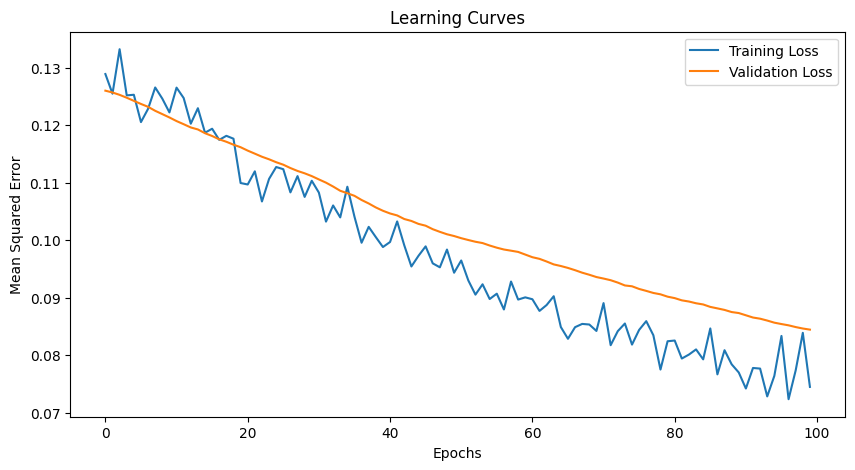


Test Features: [1, 1, 1, 0.5]
Predicted Value: [0.5040267]


In [135]:
def main():
    # Example usage with lists
    # Create sample features and target lists
    features_list = [[x['Score 1'], x['Score 2'], x['Score 3'], x['Score 4']] for x in features]
    features_list =[x for x in features_list if "None" not in x]
    
    target_list = human_score[:168]
    
    # Train the model
    result = train_regression_model(
        features_list, 
        target_list, 
        epochs=100, 
        hidden_layers=[16, 8]
    )
    
    # Example prediction
    test_features = [1, 1, 1, 0.5]
    prediction = predict_with_model(
        result['model'], 
        result['scaler'], 
        test_features
    )
    
    print("\nTest Features:", test_features)
    print("Predicted Value:", prediction[0])

if __name__ == "__main__":
    main()